In [1]:
import os, time, sys
import csv
import math, random
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from skimage.morphology import disk
from skimage.util import img_as_ubyte
from skimage.filters import rank
from skimage import io, color, exposure, transform
from sklearn.model_selection import train_test_split
import fidle

In [8]:
scale      = 0.1
images_dir = './images'
output_dir = './data-test' 

In [6]:
fidle.override('scale', 'output_dir', 'progress_verbosity')

** Warning : You try to override an inexistant variable (progress_verbosity)


In [2]:
def read_dataset():
    with open(f'{images_dir}/etiquettes.txt','r') as f:
        etiquettes= f.read()
        y=[]
        X=[]
        labels= []

        i=0
        j=0
        for class_name in etiquettes.split("\n"):
            labels.append({"class_name": class_name, "label": i})
            for file in glob.glob(f'{images_dir}/{class_name}/*.jpg'):
                image=io.imread(file)
                if len(image.shape)==2:
                    image= np.array([image,image,image])
                    image = np.transpose(image, (1, 2, 0))
                y.append(i)
                X.append(image)
                j=j+1
                fidle.utils.update_progress(class_name,j,len(glob.glob(f'{images_dir}/{class_name}/*.jpg')), verbosity=1)
            i=i+1
            j=0
            
        return np.array(X,dtype=object), np.array(y), np.array(labels)
            
    

In [5]:
X,y,labels= read_dataset()

elephant         [########################################] 100.0% of 64
bateau           [########################################] 100.0% of 67
tortue           [########################################] 100.0% of 100
helicoptere      [########################################] 100.0% of 88
kangourou        [########################################] 100.0% of 86
voilier          [########################################] 100.0% of 114
ordinateur       [########################################] 100.0% of 81
guepard          [########################################] 100.0% of 200
homard           [########################################] 100.0% of 41
libellule        [########################################] 100.0% of 40
pizza            [########################################] 100.0% of 53
rhinoceros       [########################################] 100.0% of 59
coq              [########################################] 100.0% of 49
scorpion         [##############################

In [7]:
X.shape

(1666,)

In [9]:
labels

array([{'class_name': 'elephant', 'label': 0},
       {'class_name': 'bateau', 'label': 1},
       {'class_name': 'tortue', 'label': 2},
       {'class_name': 'helicoptere', 'label': 3},
       {'class_name': 'kangourou', 'label': 4},
       {'class_name': 'voilier', 'label': 5},
       {'class_name': 'ordinateur', 'label': 6},
       {'class_name': 'guepard', 'label': 7},
       {'class_name': 'homard', 'label': 8},
       {'class_name': 'libellule', 'label': 9},
       {'class_name': 'pizza', 'label': 10},
       {'class_name': 'rhinoceros', 'label': 11},
       {'class_name': 'coq', 'label': 12},
       {'class_name': 'scorpion', 'label': 13},
       {'class_name': 'hippocampe', 'label': 14},
       {'class_name': 'stop', 'label': 15},
       {'class_name': 'tique', 'label': 16},
       {'class_name': 'montre', 'label': 17},
       {'class_name': 'chaise', 'label': 18},
       {'class_name': 'parapluie', 'label': 19}], dtype=object)

In [10]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [11]:
x_train.shape
len(x_train)

1332

In [31]:
train_size  = []
train_ratio = []
train_lx    = []
train_ly    = []

test_size   = []
test_ratio  = []
test_lx     = []
test_ly     = []

for image in x_train:
    (lx,ly,lz) = image.shape
    train_size.append(lx*ly/1024)
    train_ratio.append(lx/ly)
    train_lx.append(lx)
    train_ly.append(ly)

for image in x_test:
    (lx,ly,lz) = image.shape
    test_size.append(lx*ly/1024)
    test_ratio.append(lx/ly)
    test_lx.append(lx)
    test_ly.append(ly)

x_train shape :  (1332,)
y_train shape :  (1332,)
x_test  shape :  (334,)
y_test  shape :  (334,)


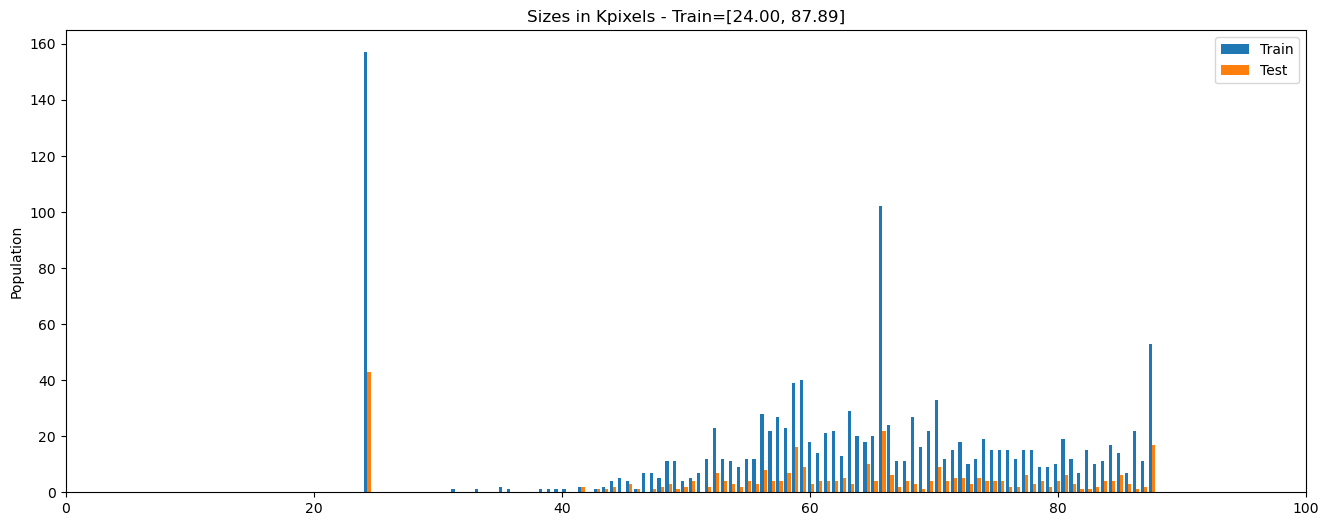

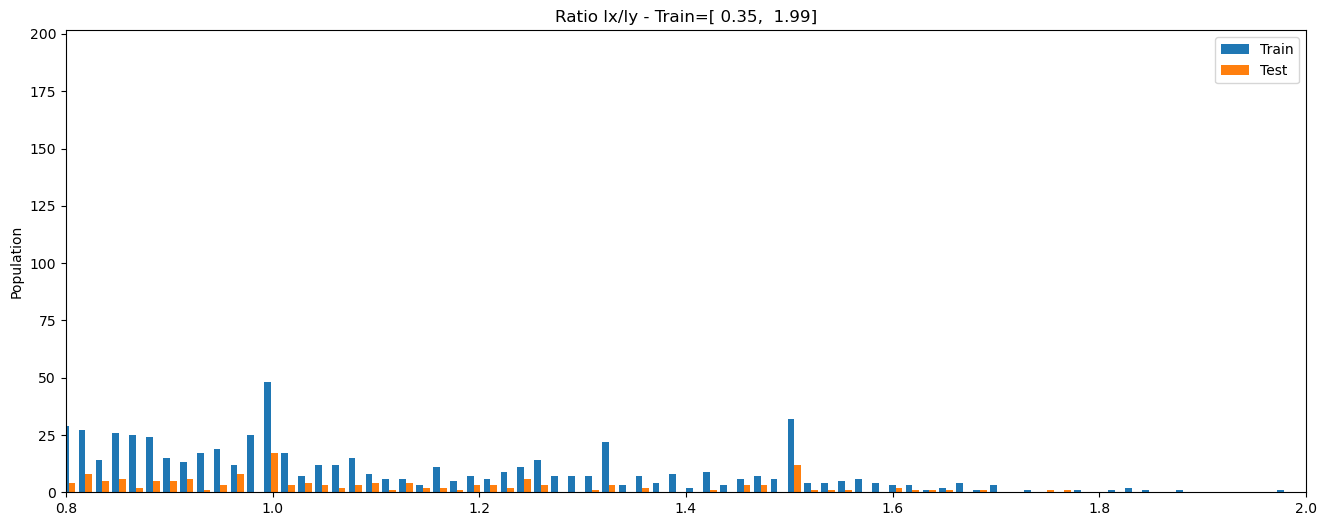

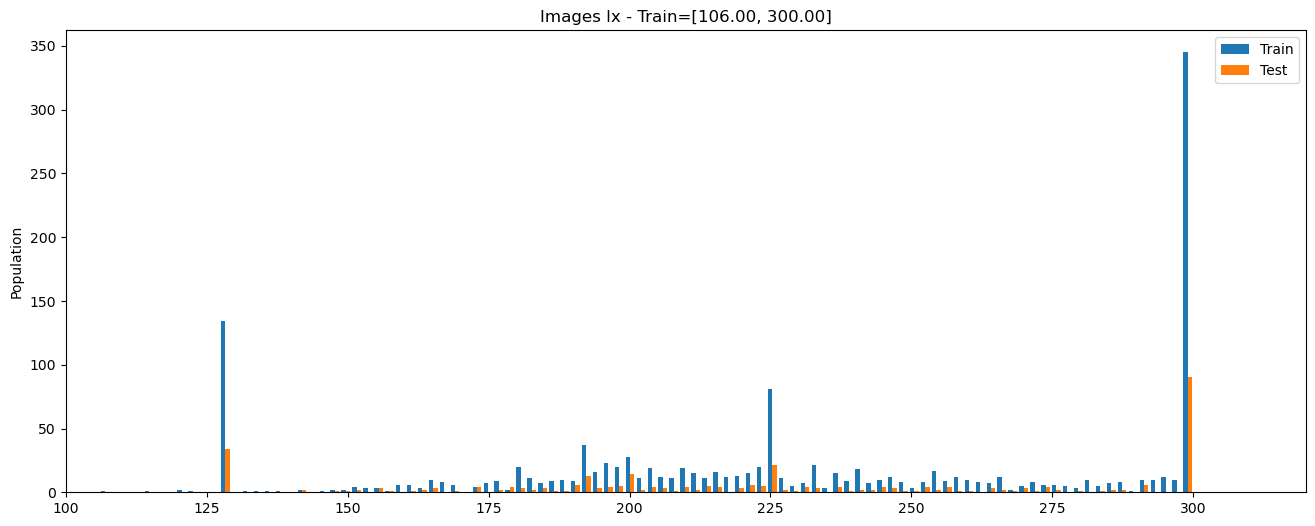

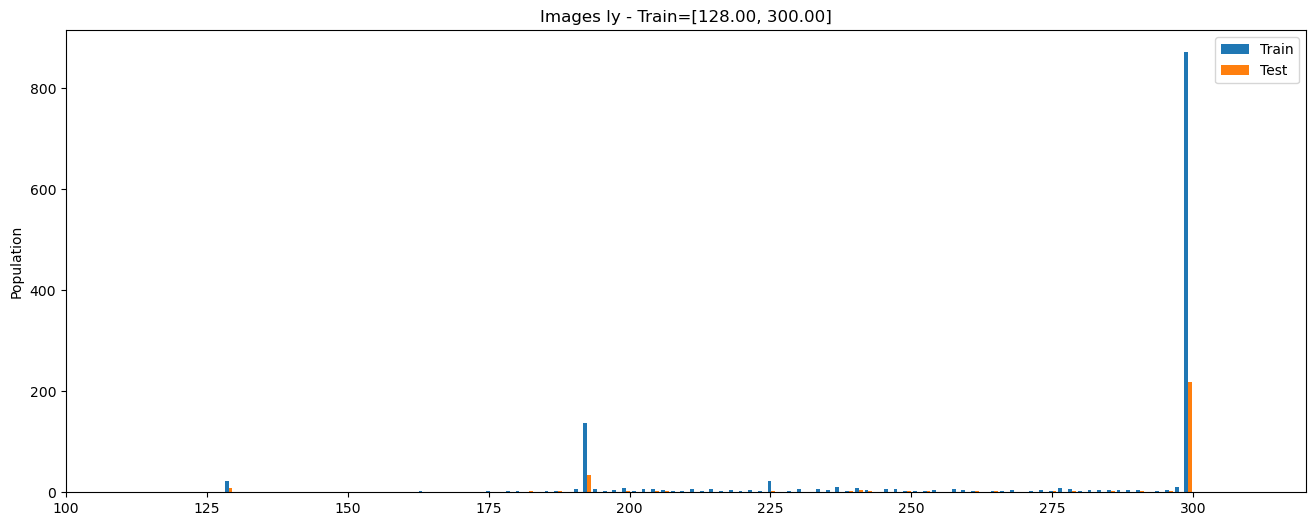

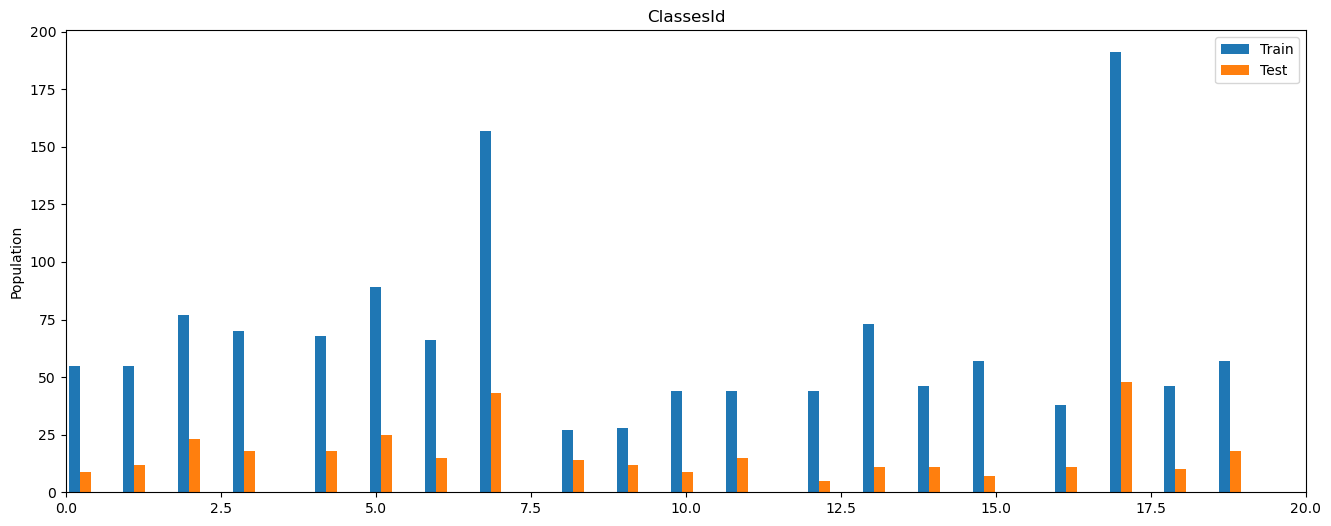

In [32]:
# ------ Global stuff
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test  shape : ",x_test.shape)
print("y_test  shape : ",y_test.shape)

# ------ Statistics / sizes
plt.figure(figsize=(16,6))
plt.hist([train_size,test_size], bins=100)
plt.gca().set(title='Sizes in Kpixels - Train=[{:5.2f}, {:5.2f}]'.format(min(train_size),max(train_size)), 
              ylabel='Population', xlim=[0,100])
plt.legend(['Train','Test'])
plt.show()

# ------ Statistics / ratio lx/ly
plt.figure(figsize=(16,6))
plt.hist([train_ratio,test_ratio], bins=100)
plt.gca().set(title='Ratio lx/ly - Train=[{:5.2f}, {:5.2f}]'.format(min(train_ratio),max(train_ratio)), 
              ylabel='Population', xlim=[0.8,2])
plt.legend(['Train','Test'])

plt.show()

# ------ Statistics / lx
plt.figure(figsize=(16,6))
plt.hist([train_lx,test_lx], bins=100)
plt.gca().set(title='Images lx - Train=[{:5.2f}, {:5.2f}]'.format(min(train_lx),max(train_lx)), 
              ylabel='Population', xlim=[100,320])
plt.legend(['Train','Test'])

plt.show()

# ------ Statistics / ly
plt.figure(figsize=(16,6))
plt.hist([train_ly,test_ly], bins=100)
plt.gca().set(title='Images ly - Train=[{:5.2f}, {:5.2f}]'.format(min(train_ly),max(train_ly)), 
              ylabel='Population', xlim=[100,320])
plt.legend(['Train','Test'])

plt.show()

# ------ Statistics / classId
plt.figure(figsize=(16,6))
plt.hist([y_train,y_test], bins=43)
plt.gca().set(title='ClassesId', ylabel='Population', xlim=[0,20])
plt.legend(['Train','Test'])
plt.show()

In [33]:
def display_images_in_grid(images, grid_size=(2, 2)):
    fig, axes = plt.subplots(*grid_size, figsize=(8, 8))

    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            # Get the current axis
            ax = axes[i, j]

            # Check if there are more images to display
            if i * grid_size[1] + j < len(images):
                # Display the image
                ax.imshow(images[i * grid_size[1] + j], cmap='gray')  # Assuming grayscale images

            # Remove x and y ticks
            ax.set_xticks([])
            ax.set_yticks([])

    plt.show()

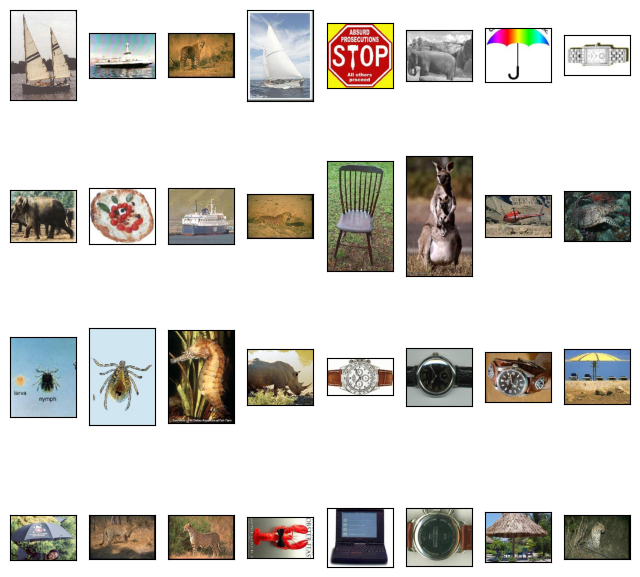

In [34]:
display_images_in_grid(x_train[0:32],(4,8))

In [35]:
def images_enhancement(images, width=25, height=25, mode='RGB'):
    '''
    Resize and convert images - doesn't change originals.
    input images must be RGBA or RGB.
    Note : all outputs are fixed size numpy array of float64
    args:
        images :         images list
        width,height :   new images size (25,25)
        mode :           RGB | RGB-HE | L | L-HE | L-LHE | L-CLAHE
    return:
        numpy array of enhanced images
    '''
    modes = { 'RGB':3, 'RGB-HE':3, 'L':1, 'L-HE':1, 'L-LHE':1, 'L-CLAHE':1}
    lz=modes[mode]
    
    out=[]
    for img in images:
        
        # ---- if RGBA, convert to RGB
        if img.shape[2]==4:
            img=color.rgba2rgb(img)
            
        # ---- Resize
        img = transform.resize(img, (width,height))

        # ---- RGB / Histogram Equalization
        if mode=='RGB-HE':
            hsv = color.rgb2hsv(img.reshape(width,height,3))
            hsv[:, :, 2] = exposure.equalize_hist(hsv[:, :, 2])
            img = color.hsv2rgb(hsv)
        
        # ---- Grayscale
        if mode=='L':
            img=color.rgb2gray(img)
            
        # ---- Grayscale / Histogram Equalization
        if mode=='L-HE':
            img=color.rgb2gray(img)
            img=exposure.equalize_hist(img)
            
        # ---- Grayscale / Local Histogram Equalization
        if mode=='L-LHE':        
            img=color.rgb2gray(img)
            img = img_as_ubyte(img)
            img=rank.equalize(img, disk(10))/255.
        
        # ---- Grayscale / Contrast Limited Adaptive Histogram Equalization (CLAHE)
        if mode=='L-CLAHE':
            img=color.rgb2gray(img)
            img=exposure.equalize_adapthist(img)
            
        # ---- Add image in list of list
        out.append(img)
        

    # ---- Reshape images
    #     (-1, width,height,1) for L
    #     (-1, width,height,3) for RGB
    #
    out = np.array(out,dtype='float64')
    out = out.reshape(-1,width,height,lz)
    return out

dataset : RGB  min,max=[0.014,1.000]  shape=(16, 25, 25, 3)


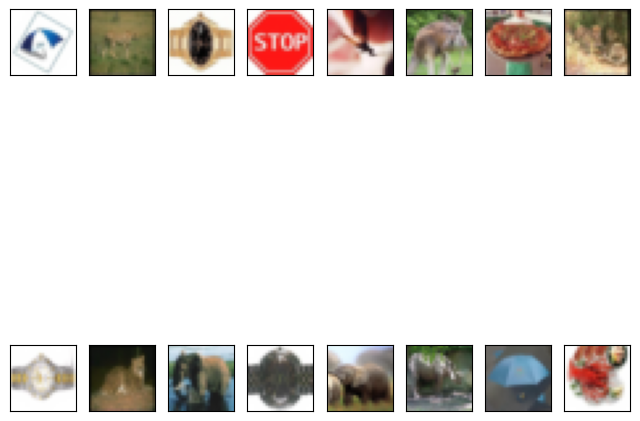

dataset : RGB-HE  min,max=[0.001,1.000]  shape=(16, 25, 25, 3)


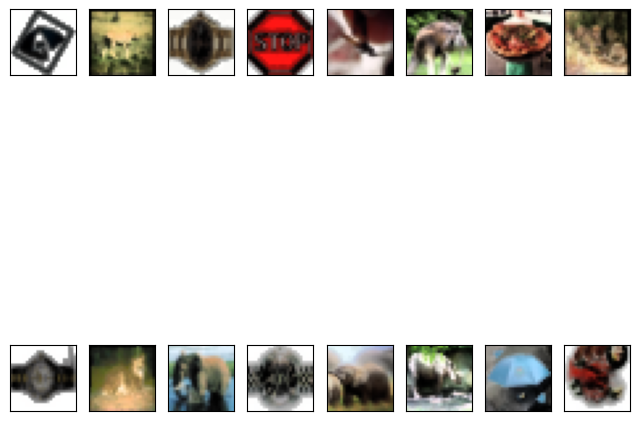

dataset : L  min,max=[0.016,1.000]  shape=(16, 25, 25, 1)


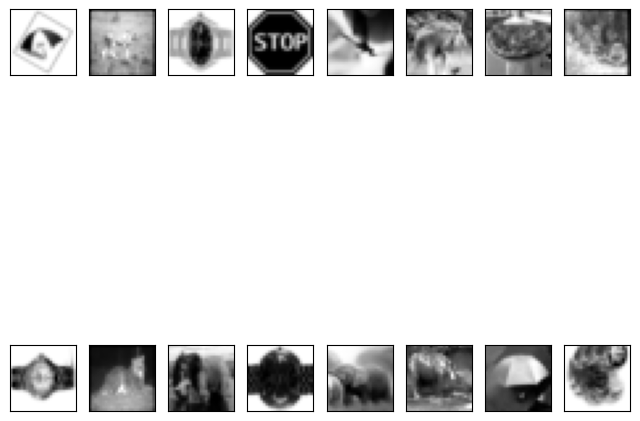

dataset : L-HE  min,max=[0.002,1.000]  shape=(16, 25, 25, 1)


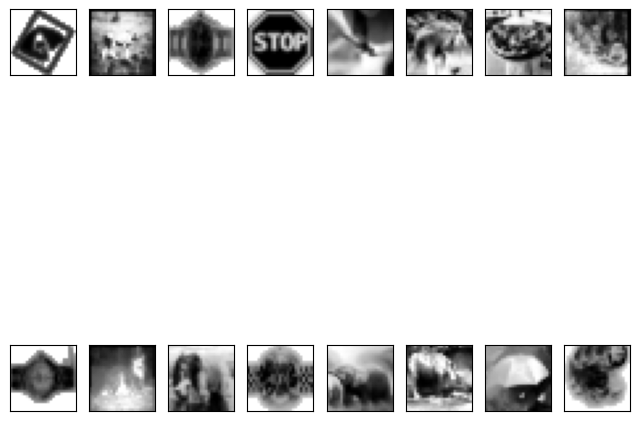

dataset : L-LHE  min,max=[0.000,1.000]  shape=(16, 25, 25, 1)


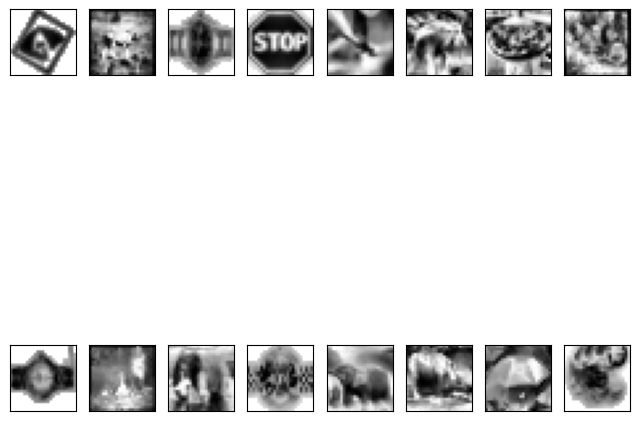

dataset : L-CLAHE  min,max=[0.000,1.000]  shape=(16, 25, 25, 1)


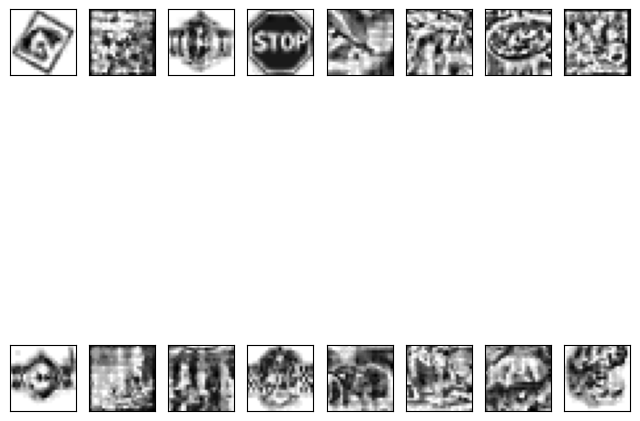

In [36]:
i=random.randint(0,len(x_train)-16)
x_samples = x_train[i:i+16]
y_samples = y_train[i:i+16]

datasets  = {}

datasets['RGB']      = images_enhancement( x_samples, width=25, height=25, mode='RGB'  )
datasets['RGB-HE']   = images_enhancement( x_samples, width=25, height=25, mode='RGB-HE'  )
datasets['L']        = images_enhancement( x_samples, width=25, height=25, mode='L'  )
datasets['L-HE']     = images_enhancement( x_samples, width=25, height=25, mode='L-HE'  )
datasets['L-LHE']    = images_enhancement( x_samples, width=25, height=25, mode='L-LHE'  )
datasets['L-CLAHE']  = images_enhancement( x_samples, width=25, height=25, mode='L-CLAHE'  )

for k,d in datasets.items():
    print("dataset : {}  min,max=[{:.3f},{:.3f}]  shape={}".format(k,d.min(),d.max(), d.shape))
    display_images_in_grid(d[0:16],(2,8))


In [37]:
def create_dir(path_name):
    if not os.path.exists(path_name):
       os.makedirs(path_name)

In [41]:
def save_h5_dataset(x_train, y_train, x_test, y_test, filename):
        
    # ---- Create h5 file
    with h5py.File(filename, "w") as f:
        f.create_dataset("x_train", data=x_train)
        f.create_dataset("y_train", data=y_train)
        f.create_dataset("x_test",  data=x_test)
        f.create_dataset("y_test",  data=y_test)
        
        
    # ---- done
    size=os.path.getsize(filename)/(1024*1024)
    print('Dataset : {:24s}  shape : {:22s} size : {:6.1f} Mo   (saved)'.format(filename, str(x_train.shape),size))

In [87]:

n_train = int( len(x_train)*scale )
n_test  = int( len(x_test)*scale )

print(f'Scale is : {scale}')
print(f'x_train length is : {n_train}')
print(f'x_test  length is : {n_test}')
print(f'output dir is     : {output_dir}\n')


create_dir(output_dir)
for s in [24, 48]:
    for m in ['RGB', 'RGB-HE', 'L', 'L-LHE']:
        # ---- A nice dataset name
        filename = f'{output_dir}/set-{s}x{s}-{m}.h5'
        # ---- Enhancement
        #      Note : x_train is a numpy array of python objects (images with <> sizes)
        #             but images_enhancement() return a real array of float64 numpy (images with same size)
        #             so, we can save it in nice h5 files
        #
        x_train_new = images_enhancement( x_train[:n_train], width=s, height=s, mode=m )
        x_test_new  = images_enhancement( x_test[:n_test],  width=s, height=s, mode=m )
        # ---- Save
        save_h5_dataset( x_train_new, y_train[:n_train], x_test_new, y_test[:n_test], filename)

x_train_new,x_test_new=0,0


Scale is : 0.7
x_train length is : 932
x_test  length is : 233
output dir is     : ./data

Dataset : ./data/set-24x24-RGB.h5   shape : (932, 24, 24, 3)       size :   15.4 Mo   (saved)
Dataset : ./data/set-24x24-RGB-HE.h5  shape : (932, 24, 24, 3)       size :   15.4 Mo   (saved)
Dataset : ./data/set-24x24-L.h5     shape : (932, 24, 24, 1)       size :    5.1 Mo   (saved)
Dataset : ./data/set-24x24-L-LHE.h5  shape : (932, 24, 24, 1)       size :    5.1 Mo   (saved)
Dataset : ./data/set-48x48-RGB.h5   shape : (932, 48, 48, 3)       size :   61.4 Mo   (saved)
Dataset : ./data/set-48x48-RGB-HE.h5  shape : (932, 48, 48, 3)       size :   61.4 Mo   (saved)
Dataset : ./data/set-48x48-L.h5     shape : (932, 48, 48, 1)       size :   20.5 Mo   (saved)
Dataset : ./data/set-48x48-L-LHE.h5  shape : (932, 48, 48, 1)       size :   20.5 Mo   (saved)


dataset loaded from h5 file.


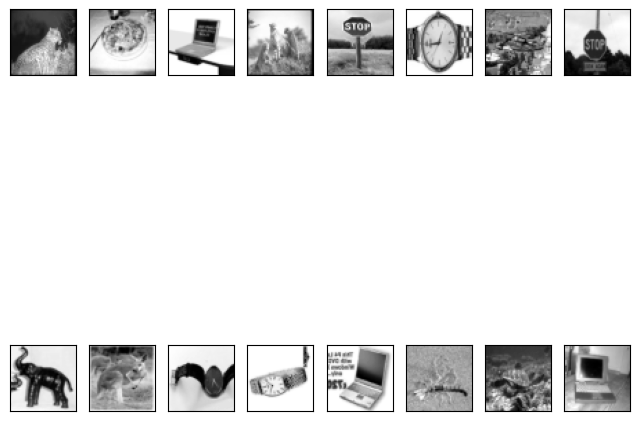

In [88]:

dataset='set-48x48-L'
samples=range(24)

with  h5py.File(f'{output_dir}/{dataset}.h5','r') as f:
    x_tmp = f['x_train'][:]
    y_tmp = f['y_train'][:]
    print("dataset loaded from h5 file.")
display_images_in_grid(x_tmp[0:16],(2,8))

x_tmp,y_tmp=0,0
